In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

In [4]:
mu = 0
mu2 = 0.5
mu3 = 0.75

In [5]:
variance = 0.5
variance2 = 1
variance3 = 1.5

In [6]:
sigma = math.sqrt(variance)
sigma2 = math.sqrt(variance2)
sigma3 = math.sqrt(variance3)

In [7]:
x = np.linspace(mu-3*variance,mu+3*variance, 40)
x2 = np.linspace(mu2-3*variance2, mu+3*variance2, 40)
x3 = np.linspace(mu2-3*variance3, mu+3*variance3, 40)

In [8]:
A = np.zeros((559,1))
A[20:60] = mlab.normpdf(x, mu, sigma).reshape(40,1)
A[230:270] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
A[420:460] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
A = A.reshape(559)

In [9]:
B = np.zeros((559,1))
B[23:63] = mlab.normpdf(x, mu, sigma).reshape(40,1)
B[400:440] =  mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
B[470:510] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
B = B.reshape(559)


In [10]:
C = np.zeros((559, 1))
C[320:360] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
C[433:473] = mlab.normpdf(x, mu, sigma).reshape(40,1)
C[128:168] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
C = C.reshape(559)

In [11]:
spectralmatrix = np.zeros((256, 256, 559))
functionalmatrix = np.zeros((256, 256))
Amatrix = np.zeros((256, 256))
Bmatrix = np.zeros((256, 256))
Cmatrix =np.zeros((256, 256))
xaxis = spectralmatrix.shape[0]
yaxis = spectralmatrix.shape[1]

In [12]:
np.random.seed(122)
a=np.random.rand(1)
b=np.random.rand(1)
c=np.random.rand(1)
spatialfrequency = (2*np.pi)/64
for x in range(xaxis):
    for y in range(yaxis):
        a = abs(np.sin(y*spatialfrequency))
        b = abs(np.sin(x*spatialfrequency) + np.sin(y*spatialfrequency))
        c = np.sin(x*spatialfrequency)**2
    #can make a, b, c as a function of x and y with some random noise
        spectralmatrix[x,y,:] = a*A + b*B + c*C
        functionalmatrix[x][y] = 2*a + b + 9*c
        Amatrix[x][y]=a
        Bmatrix[x][y]=b
        Cmatrix[x][y]=c
        

In [16]:
#spectralmatrix[1,2,:]
spectralmatrix.shape

(256, 256, 559)

In [17]:
functionalmatrix.shape

(256, 256)

In [22]:
#LinearRegression
#model: Y = 2a+b+9c

pts=256
a=Amatrix
b=Bmatrix
c=Cmatrix
B0=0
B1=2
B2=1
B3=9
yactual=B0+B1*a[0]+B2*b[0]+B3*c[0]

In the above cell, I have used the first element of the array for calculating 'yactual' value

In [23]:
len(Amatrix[0])

256

In [35]:
#performing multiple simple linear regression for only the a,Amatrix, because of error of the .fit function

from sklearn import linear_model
regr=linear_model.LinearRegression()#performing the simple linear regression
regr.fit(a[0].reshape(len(a),1),yactual.reshape(len(yactual),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The .fit function is throwing out an error saying that first argument in that function must be 2 Dimensional or lesser.

When I try to put in all the three matrixes A, B, C, it is giving an error saying that the first argument is four dimensional, which I could'nt resolve


Hence, to see how it works out for a single matrix, I have used the fit function

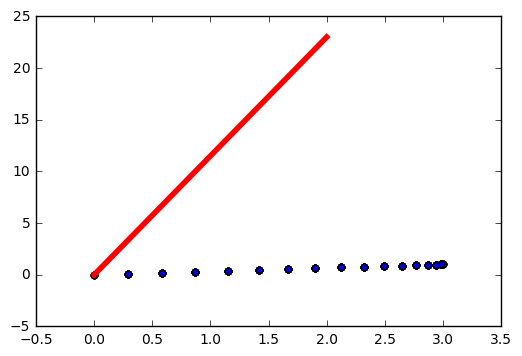

In [32]:
plt.scatter(yactual.reshape(len(yactual),1),a[0].reshape(len(yactual),1)) 
plt.plot([0,2],[0,23],lw=4,color='red')#the line Y=2a+b+9c
plt.show()